# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [26]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd 
import chromedriver_autoinstaller

In [28]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [29]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [30]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [33]:
# Extract all rows of data
rows = soup.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [37]:
# Create an empty list
row_list = []

# Loop through the scraped data to create a list of rows
for row in rows:
    # Extract the relevant data from each row
    cells = row.find_all('td')  # Find all <td> elements in the row
    row_data = [cell.text.strip() for cell in cells]  # Get text from each cell and strip whitespace
    # Append the row data to the row_list
    row_list.append(row_data)

# Now row_list contains all the rows created from the scraped data
print(row_list)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [38]:
print(rows)  # Check if rows contains any data

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

In [40]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

mars_temp_df = pd.DataFrame(row_list, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])


In [43]:
# Confirm DataFrame was created successfully
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [47]:
# Examine data type of each column
mars_temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [52]:
# Change data types for data analysis
mars_temp_df = mars_temp_df.astype({
        'terrestrial_date': 'datetime64[ns]',
        'sol' : 'int64',
        'ls': 'int64',
        'month': 'int64',
        'min_temp': 'float64',
        'pressure': 'float64',
})

In [54]:
# Confirm type changes were successful by examining data types again
mars_temp_df.dtypes


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [57]:
# 1. How many months are there on Mars?

# Count unique months in the DataFrame
unique_months = mars_temp_df['month'].nunique()
print("Number of unique months on Mars:", unique_months)

# Count the number of entries for each month
monthly_counts = mars_temp_df.groupby('month').size()
print("Count of entries for each month:")
print(monthly_counts)

Number of unique months on Mars: 12
Count of entries for each month:
month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
dtype: int64


In [59]:
# 2. How many Martian days' worth of data are there?
martian_days_count = mars_temp_df.shape[0]
print("Number of Martian days' worth of data:", martian_days_count)

Number of Martian days' worth of data: 1867


In [66]:
# 3. What is the average low temperature by month?
# Calculate the average low temperature by month
average_temp_df = mars_temp_df.groupby('month')['min_temp'].mean()
print("Average temperature by month:")
print(average_temp)

Average temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


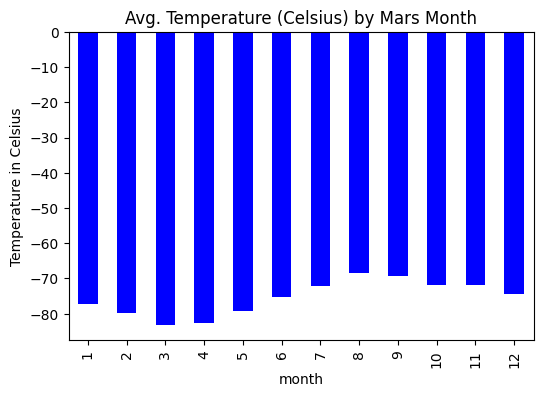

In [69]:
# Convert Series to DataFrame
# -average_temp_df = average_low_temp_by_month.to_frame(name='average_min_temp').reset_index()

# Plot the average temperature by month
average_temp_df.plot(kind='bar', color='blue', figsize=(6,4), x='month', y='average_min_temp')
plt.title('Avg. Temperature (Celsius) by Mars Month')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.savefig('Average temp per month')
plt.show()

In [ ]:
# Identify the coldest and hottest months in Curiosity's location

# Calculate the average minimum temperature by month
average_min_temp = mars_temp_df.groupby('month')['min_temp'].mean()

# Identify the coldest month
coldest_month = average_min_temp.idxmin()  # Month with the lowest average temperature
coldest_temp = average_min_temp.min()       # Lowest average temperature

# Identify the hottest month
hottest_month = average_min_temp.idxmax()   # Month with the highest average temperature
hottest_temp = average_min_temp.max()        # Highest average temperature

# Print results
print("Coldest month:", coldest_month, "with an average temperature of:", coldest_temp)
print("Hottest month:", hottest_month, "with an average temperature of:", hottest_temp)

Coldest month: 3 with an average temperature of: -83.30729166666667
Hottest month: 8 with an average temperature of: -68.38297872340425


In [74]:
# Calculate the average minimum temperature by month
average_min_temp = mars_temp_df.groupby('month')['min_temp'].mean()

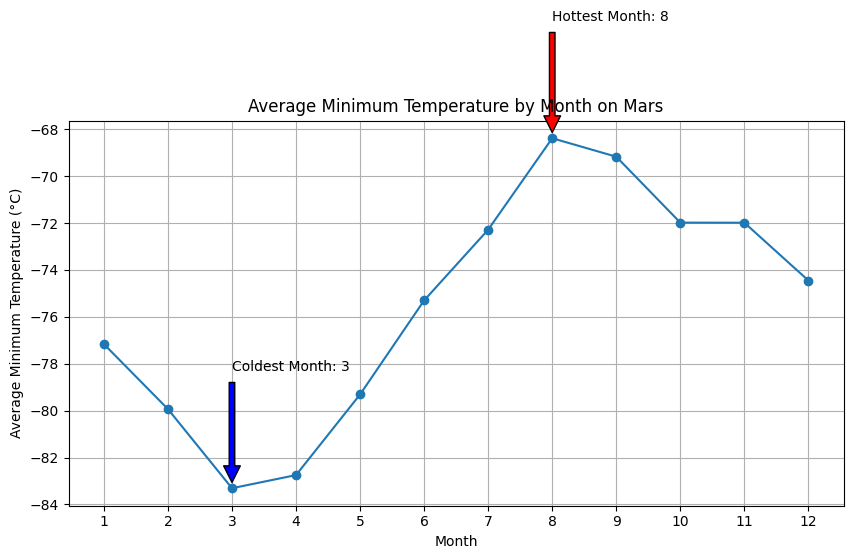

In [75]:
# Plot the coldest and hottest months in Curiosity's location
# Create a line plot
plt.figure(figsize=(10, 5))
plt.plot(average_min_temp.index, average_min_temp.values, marker='o')

# Add titles and labels
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')

# Highlight the coldest and hottest months
plt.annotate(f'Coldest Month: {coldest_month}', xy=(coldest_month, coldest_temp), 
             xytext=(coldest_month, coldest_temp + 5), 
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate(f'Hottest Month: {hottest_month}', xy=(hottest_month, hottest_temp), 
             xytext=(hottest_month, hottest_temp + 5), 
             arrowprops=dict(facecolor='red', shrink=0.05))

# Show grid
plt.grid()

# Show the plot
plt.xticks(average_min_temp.index)  # Ensure all months are labeled
plt.show()

In [81]:
# 4. Average pressure by Martian month

average_pressure=mars_temp_df.groupby('month')['pressure'].mean()

average_pressure



month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

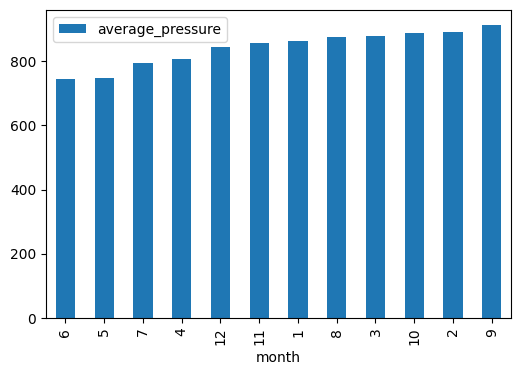

Lowest atmospheric pressure is in the sixth month and highest is in the ninth on average.


In [89]:
# Plot the average pressure by month

# avg_pressure_df = average_pressure.to_frame(name='average_pressure').reset_index()
avg_pressure_df = avg_pressure_df.sort_values(by='average_pressure')
#plot
avg_pressure_df.plot(kind='bar',x='month',y='average_pressure',figsize=(6,4))
plt.xlabel='month'
plt.ylabel='Atmospheric Pressure'
plt.title='Average Pressure by Month'

plt.show()

print ("Lowest atmospheric pressure is in the sixth month and highest is in the ninth on average.")

# About how many terrestrial (Earth) days exist in a Martian year? Answer these questions:
 - Consider how many days elapse on Earth in the time that Mars circles the Sun once.
 - Visually estimate the result by plotting the daily minimum temperature of each observation.

A Martian year is approximately 687.0 Earth days.


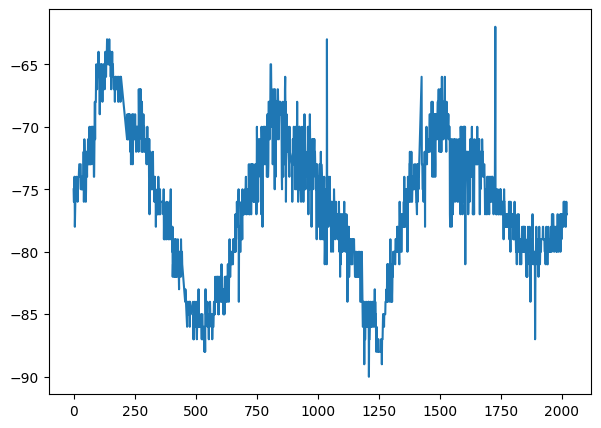

In [ ]:
# 5. How many terrestrial (earth) days are there in a Martian year?


#Plotting a chart with terrestrial days and minimunm temprature
#Create a dataframe 
mars_temp_df = mars_temp_df[['terrestrial_date', 'min_temp']]
# Convert 'terrestrial_date' to datetime 
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])

# Calculate the number of days from the start date
mars_temp_df['days_from_start'] = (mars_temp_df['terrestrial_date'] - mars_temp_df['terrestrial_date'].min()).dt.days

day_temp_df = mars_temp_df[['days_from_start', 'min_temp']]

# Plotting
plt.figure(figsize=(7, 5))
plt.plot(day_temp_df['days_from_start'], day_temp_df['min_temp'])
plt.title = 'Minimum Temperature by Number of Terrestrial Days' 
plt.xlabel = 'Number of Terrestrial Days'
plt.ylabel = 'Minimum Temperature (°C)'  
plt.savefig('Temp_by_Terrestrial_Days.png')

plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [112]:
# Write the data to a CSV
mars_temp_df.to_csv('Mars_Temp_Data.csv', index=True)

In [113]:
mars_temp_df

,terrestrial_date,min_temp,days_from_start
0,2012-08-16,-75.0,0
1,2012-08-17,-76.0,1
2,2012-08-18,-76.0,2
3,2012-08-19,-74.0,3
4,2012-08-20,-74.0,4
...,...,...,...
1862,2018-02-23,-78.0,2017
1863,2018-02-24,-77.0,2018
1864,2018-02-25,-76.0,2019
1865,2018-02-26,-77.0,2020


In [114]:
browser.quit()